In [3]:
"""Implementation of Self Organizing Neural Network (SONN) from Scratch
author: Peter Mankowski
-Construct a Self Organizing Neural Network (SONN) or Kohonen Network with 100 neurons arranged in a
     2-dimensional matrix with 10 rows and 10 columns
-Train the network with 1500 2-dimensional input vectors randomly generated in the interval between -1 and +1
-Select initial synaptic weights randomly in the same interval -1 and +1
-Assign learning rate parameter \alpha is equal to 0.1
-Goal: classify 2-dimensional input vectors such that each neuron in the network should respond only to
     the input vectors occurring in its region"""
import math
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Generating Data : using uniform random number generator 
data_ = np.random.uniform(-1, 1, (1500, 2))
print(data_.shape)

(1500, 2)


In [6]:
# Hyperparameter Initialization
x, y = 10, 10        # dimensions of Map
sigma = 1.           # spread of neighborhood
learning_rate = 0.5  # learning rate
epochs = 50000       # no of iterations
decay_parameter = epochs / 2   # decay parameter
  
"""Activation map and Assigning Weights using random number generation""" 
activation_map = np.zeros((x, y))
weights = 2 * (np.random.ranf((x, y, data_.shape[1])) - 0.5)
  
# Define Neighborhood Region
neighbour_x = np.arange(x)
neighbour_y = np.arange(y)
  
# Function: decay_learning_rate_sigma
def decay_learning_rate_sigma(iteration):
  learning_rate_ = learning_rate/(1 + iteration / decay_parameter)
  sigma_ = sigma / (1 + iteration / decay_parameter)
  
  return learning_rate_, sigma_
  
# Function: to get winner neuron
def get_winner_neuron(x):
  s = np.subtract(x, weights) # x - w
  it = np.nditer(activation_map, flags =['multi_index'])
  while not it.finished:
      # || x - w ||
      activation_map[it.multi_index] = np.linalg.norm(s[it.multi_index])  
      it.iternext()
  
  return np.unravel_index(activation_map.argmin(), activation_map.shape)
  
# Update weights
def update_weights(win_neuron, inputx, iteration):
  # decay learning rate and sigma
  learning_rate_, sigma_ = decay_learning_rate_sigma(iteration)
  
  # get neighborhood about winning neuron (Mexican hat function)
  d = 2 * np.pi * (sigma_**2)
  ax = np.exp(-1 * np.square(neighbour_x - win_neuron[0]) / d)
  ay = np.exp(-1 * np.square(neighbour_y - win_neuron[1]) / d)
  
  neighborhood = np.outer(ax, ay)
  
  it = np.nditer(neighborhood, flags = ['multi_index'])
  while not it.finished:
      weights[it.multi_index] += learning_rate_ * neighborhood[it.multi_index] * (inputx - weights[it.multi_index])
      it.iternext()

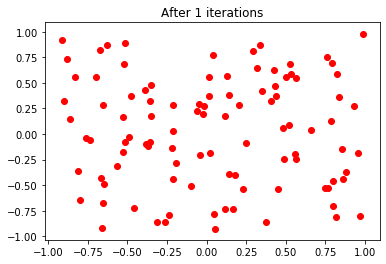

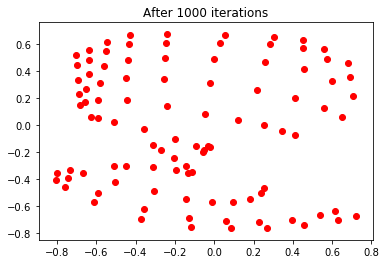

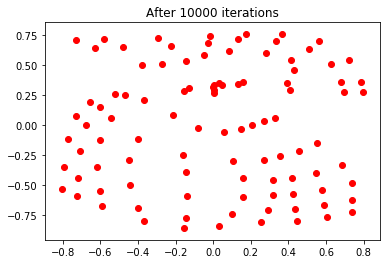

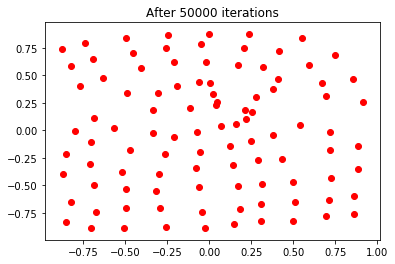

In [11]:
# Training model: Learning Phase
for epoch in tqdm(range(1, epochs + 1)):
  np.random.shuffle(data_)
  idx = np.random.randint(0, data_.shape[0])
  win_neuron = get_winner_neuron(data_[idx])
  update_weights(win_neuron, data_[idx], epoch)
  
  if epoch == 1 or epoch == 100 == 0 or epoch == 1000 or epoch == 10000 or epoch == 50000:
        plot_x = []
        plot_y = []
  
        for i in range(weights.shape[0]):
          for j in range(weights.shape[1]):
            plot_x.append(weights[i][j][0])
            plot_y.append(weights[i][j][1])
  
        plt.title('After ' + str(epoch) + ' iterations')
        plt.scatter(plot_x, plot_y, c = 'r')
        plt.show()
        plt.close()

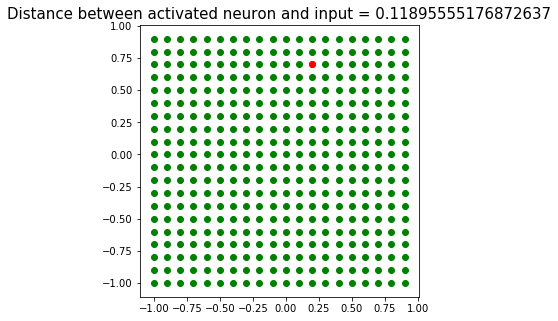

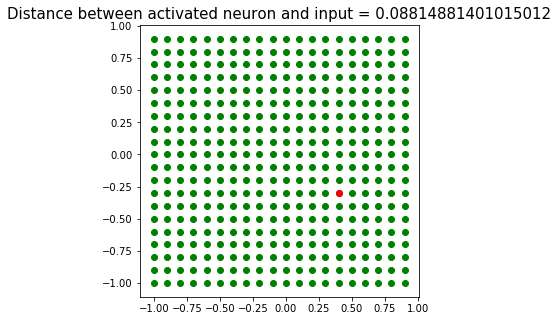

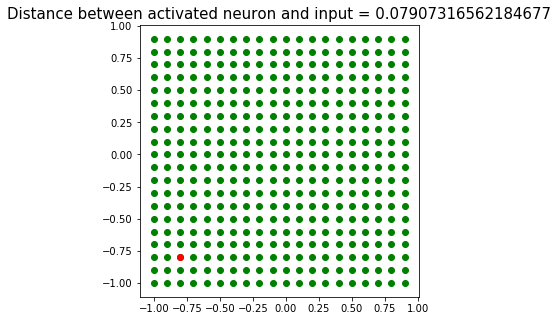

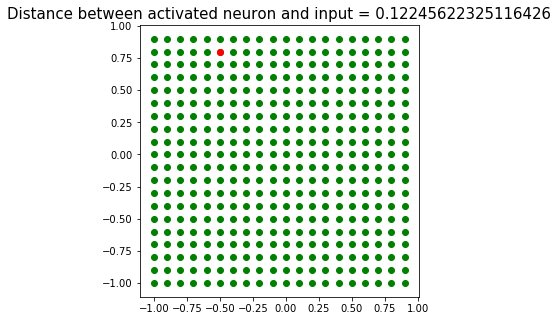

In [17]:
"""test"""
# Testing the model performance
test_inputs = np.array([[0.1, 0.8], [0.5, -0.2], [-0.8, -0.9], [-0.6, 0.9]])
# print(test_inputs.shape)

# The plots below depict the working of this Kohonen Network on
# given test inputs [0.1, 0.8], [0.5, -0.2], [-0.8, -0.9], [-0.6, 0.9]
for i in range(test_inputs.shape[0]):
    test_input = test_inputs[i, :]
    win_neuron = get_winner_neuron(test_input)

    plot_x = np.arange(-1, 1, 0.1)
    plot_y = np.arange(-1, 1, 0.1)
    xx, yy = np.meshgrid(plot_x, plot_y)

    coordx, coordy = weights[win_neuron[0]][win_neuron[1]][0],weights[win_neuron[0]][win_neuron[1]][1]
    dist = math.sqrt((coordx-test_input[0])**2 + (coordy - test_input[1])**2)
    coordx = round(coordx, 1)
    coordy = round(coordy, 1)

    plt.figure(figsize =(5, 5))
    plt.title("Distance between activated neuron and input = " + str(dist), fontsize = 15)
    plt.scatter(xx, yy, c = 'g')
    plt.scatter(coordx, coordy, c = 'r')
    plt.show()
    plt.close()
